Exp:7
Aim: Implement decision tree classification/regression technique for given 
dataset. Developed model should be able to answer the given queries.


Dataset:The Tumor Dataset  for classifying tumors as benign (non-cancerous) or malignant (cancerous).
 Breast Cancer Wisconsin Dataset (BCWD)

In [52]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
rs = 123

In [54]:
tumor_df = pd.read_csv("tumor.csv")

In [55]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [56]:
print(tumor_df.isnull().sum())

print("\nSummary Statistics:\n", tumor_df.describe())



Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

Summary Statistics:
             Clump    UnifSize   UnifShape     MargAdh  SingEpiSize  \
count  683.000000  683.000000  683.000000  683.000000   683.000000   
mean     4.442167    3.150805    3.215227    2.830161     3.234261   
std      2.820761    3.065145    2.988581    2.864562     2.223085   
min      1.000000    1.000000    1.000000    1.000000     1.000000   
25%      2.000000    1.000000    1.000000    1.000000     2.000000   
50%      4.000000    1.000000    1.000000    1.000000     2.000000   
75%      6.000000    5.000000    5.000000    4.000000     4.000000   
max     10.000000   10.000000   10.000000   10.000000    10.000000   

          BareNuc  BlandChrom    NormNucl         Mit       Class  
count  683.000000  683.000000  683.000000  683.000000  683.000000  
mean     3.544656    3.44509

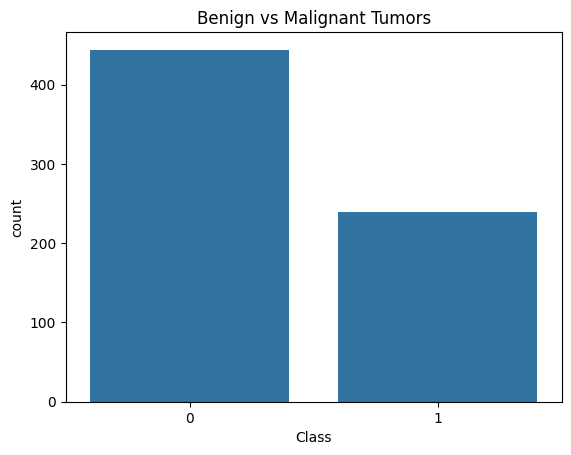

In [57]:
# Countplot of Benign vs Malignant
def plot_class_distribution(tumor_df):
    sns.countplot(x=tumor_df["Class"])
    plt.title("Benign vs Malignant Tumors")
    plt.show()
plot_class_distribution(tumor_df)


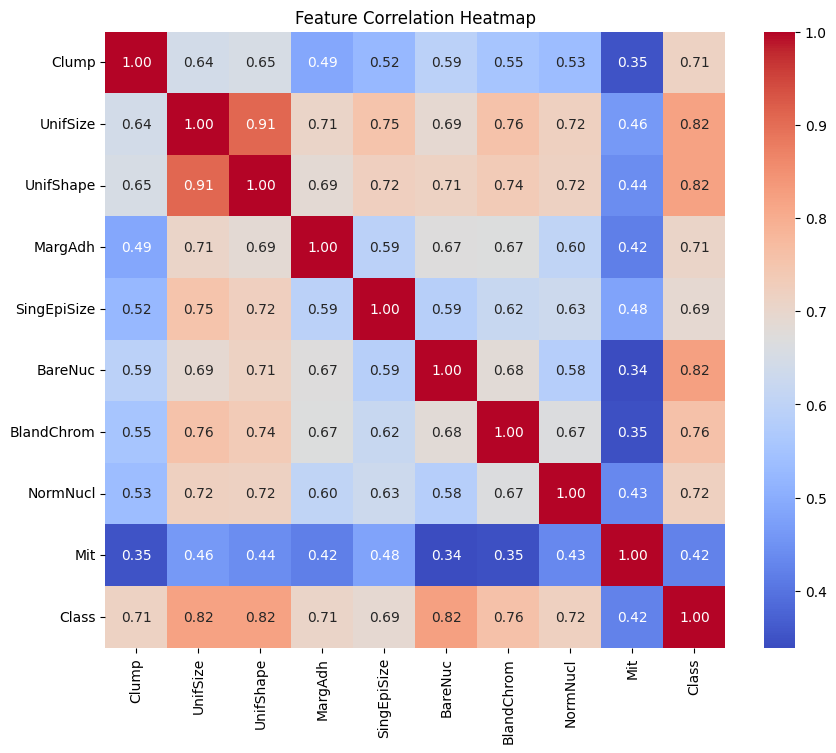

In [58]:

def plot_correlation_heatmap(tumor_df):
    plt.figure(figsize=(10,8))
    sns.heatmap(tumor_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()
plot_correlation_heatmap(tumor_df)


In [59]:
# Get the input features and target variables
X = tumor_df.iloc[:, :-1]
y = tumor_df.iloc[:, -1:]

In [60]:
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [61]:
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)

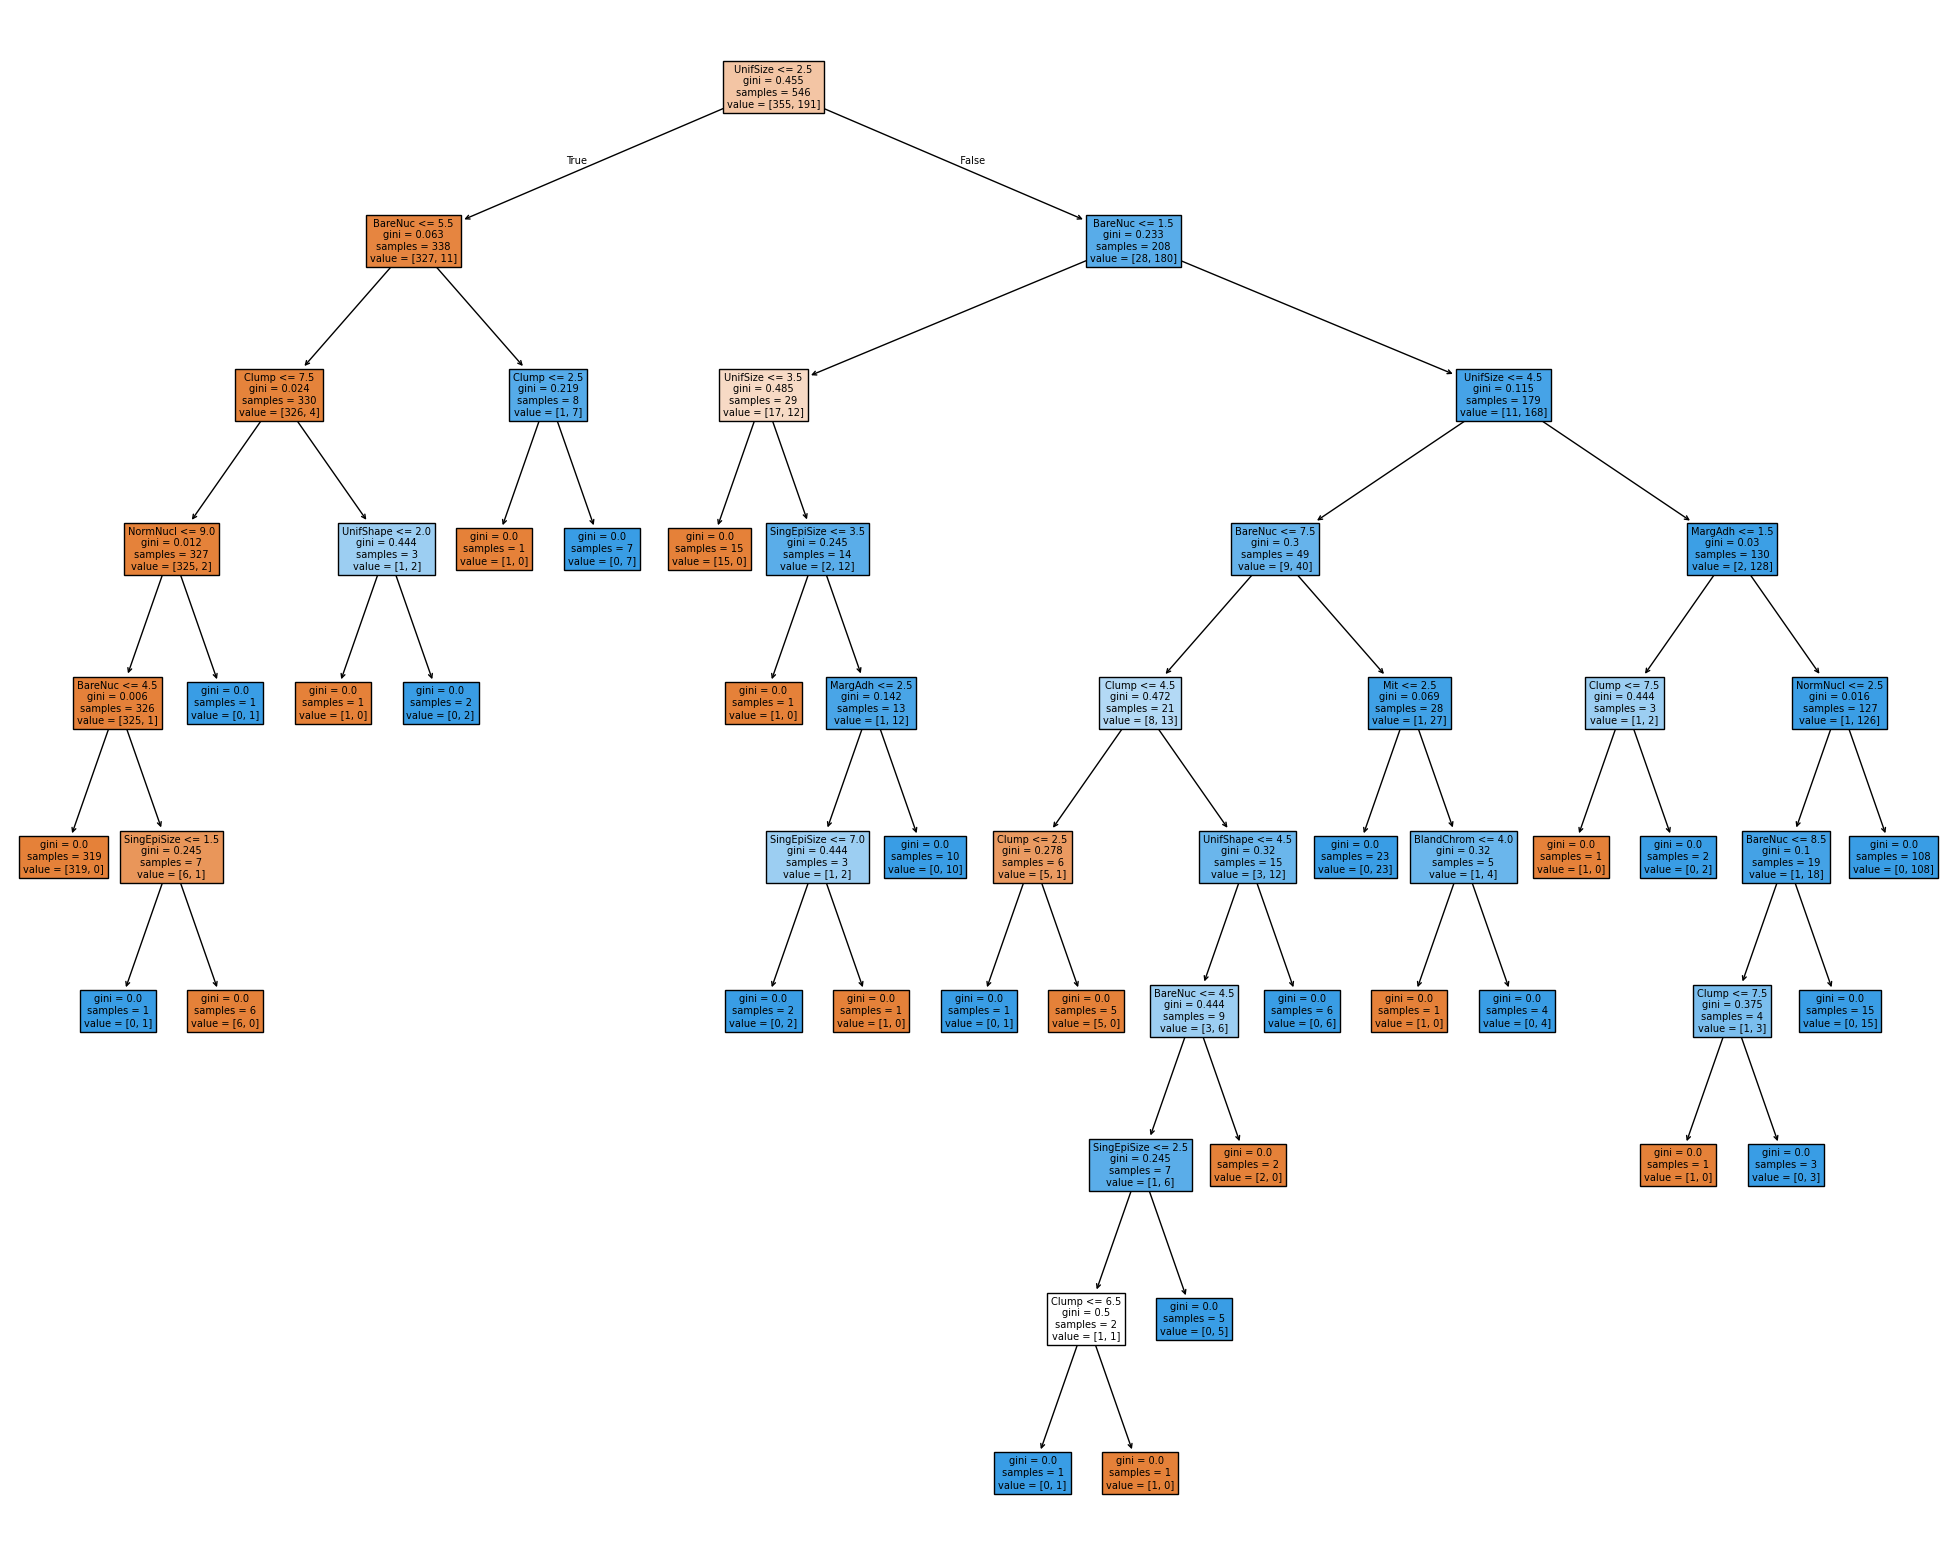

In [62]:

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(25, 20)) 
    tree.plot_tree(model, feature_names=feature_names, filled=True)  
    plt.show()  

feature_names = X.columns.values  
plot_decision_tree(model, feature_names)

In [63]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos
evaluate_metrics(y_test, preds)

{'accuracy': 0.9562043795620438,
 'recall': 0.9583333333333334,
 'precision': 0.92,
 'f1score': 0.9387755102040817}

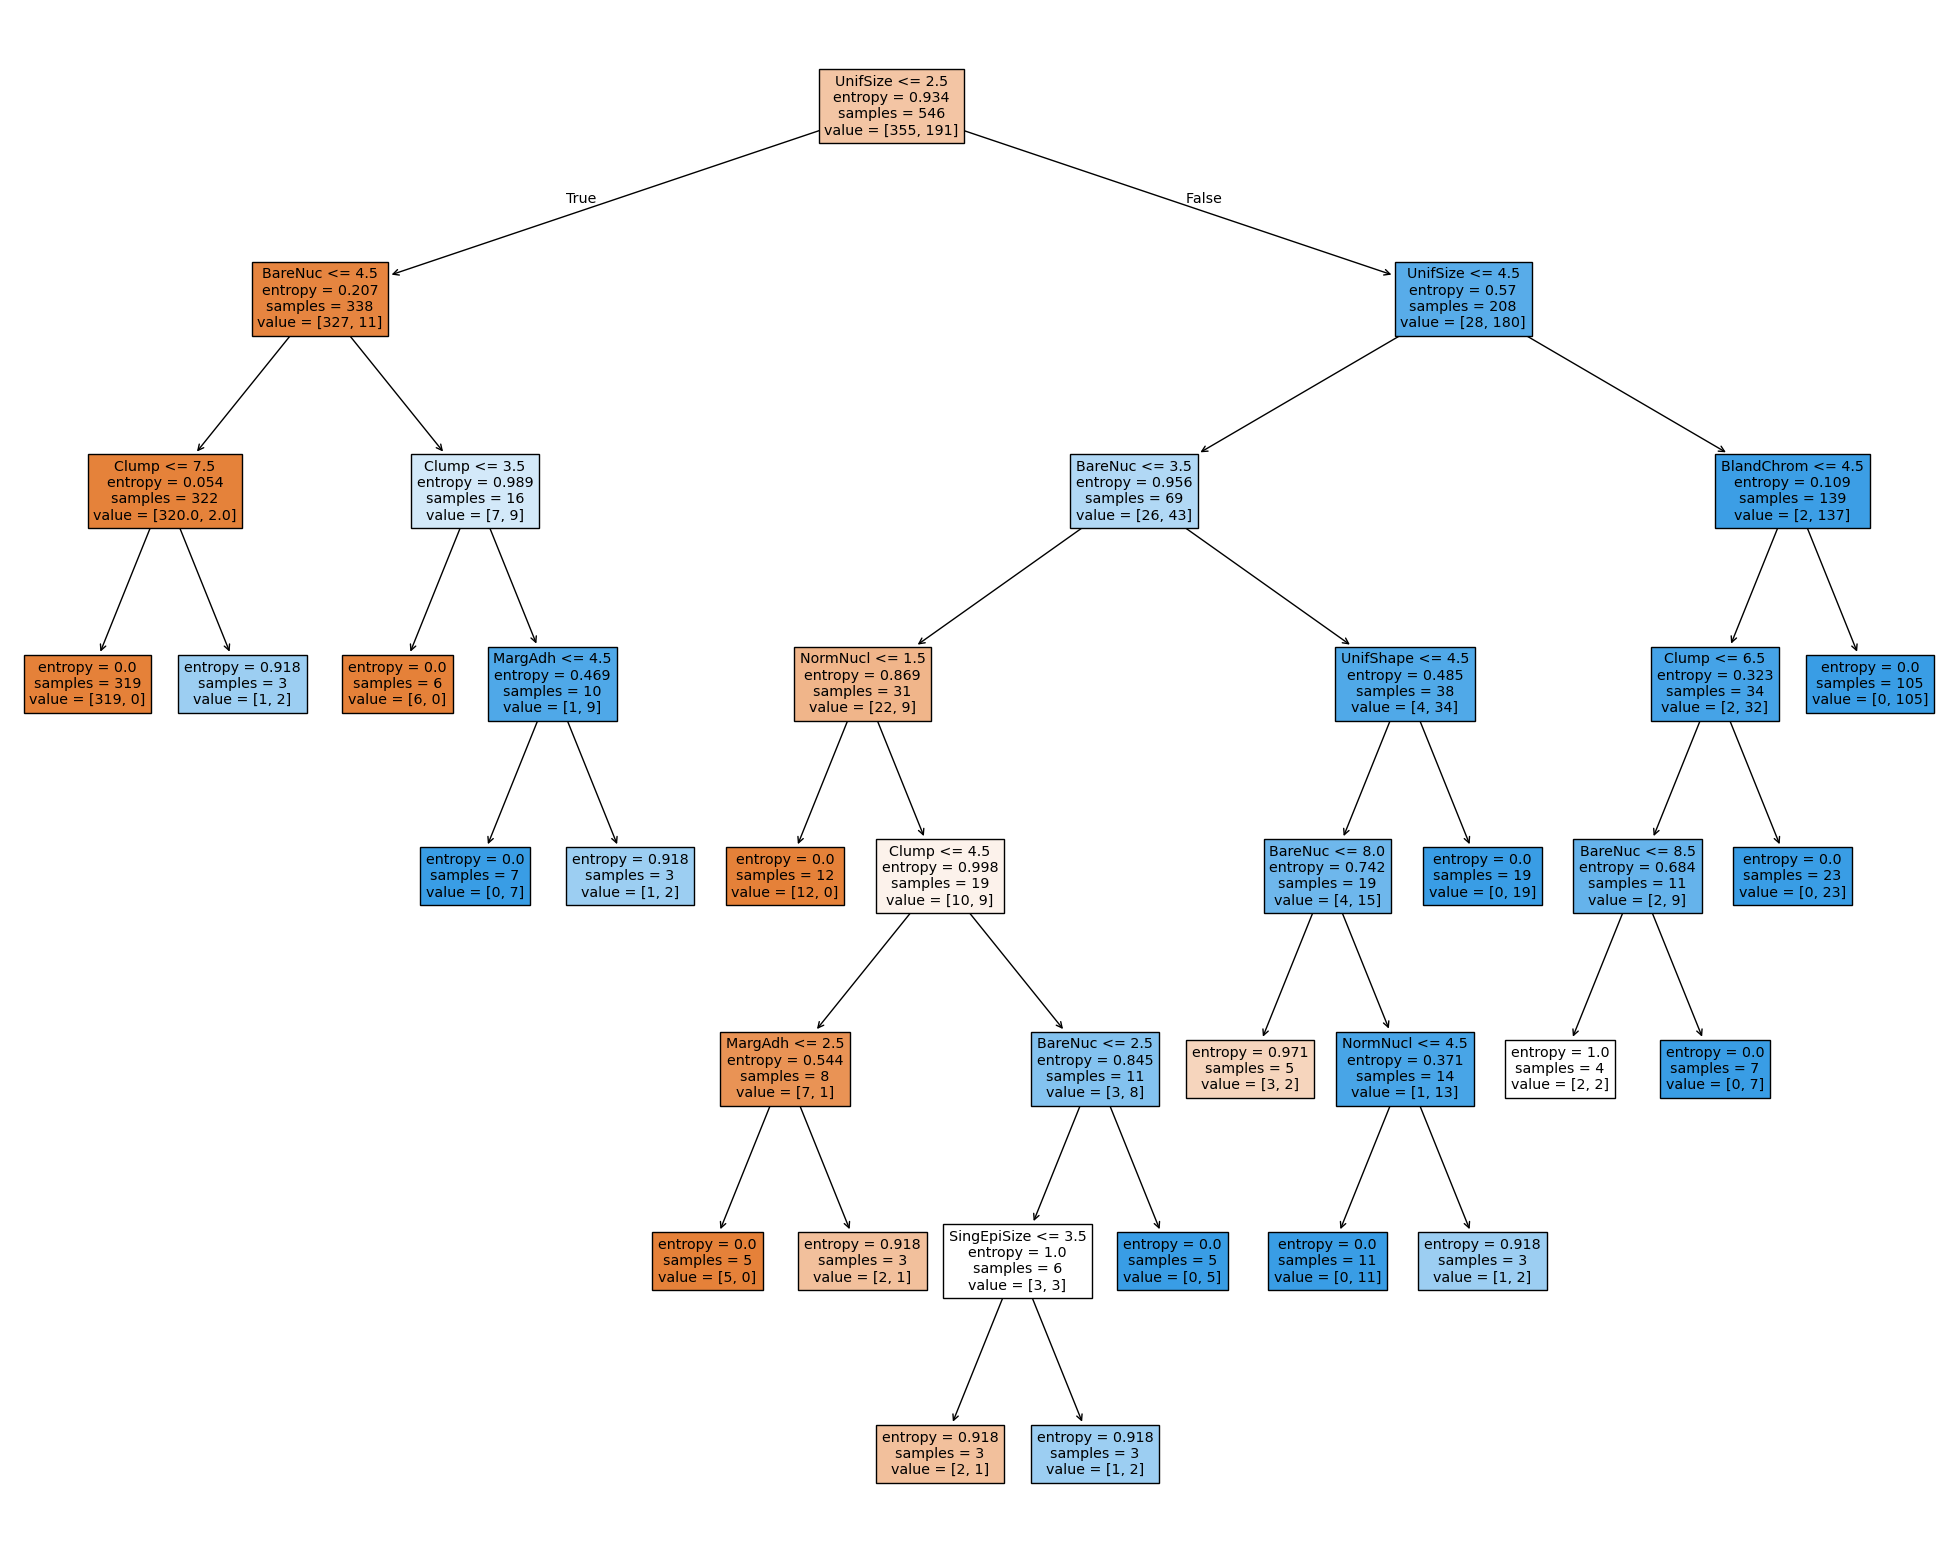

In [64]:
custom_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, random_state=rs)
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
plot_decision_tree(custom_model, feature_names)

In [65]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9635036496350365,
 'recall': 0.9166666666666666,
 'precision': 0.9777777777777777,
 'f1score': 0.946236559139785}

F1 score has increased to 0.946 now, which seems better than the previous default decision tree model.
Accuracy:96.35%